In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

from src.data_processing import read_netcdfs

import warnings
warnings.filterwarnings('ignore', 'numpy equal will not check object identity in the future')

In [20]:
def plot_ci(ds, **ax_kwargs):
    mean_dims = ['session', 'tetrode1', 'tetrode2']
    ci = 1.96 * ds.std(mean_dims)
    mean = ds.mean(mean_dims)
    (mean + ci).plot(**ax_kwargs, linestyle='--')
    mean.plot(**ax_kwargs, linestyle='-', linewidth=3)
    (mean - ci).plot(**ax_kwargs, linestyle='--')

def plot_delay(path, group, brain_area1, brain_area2, frequency_band, figsize=(15, 5)):
    transform_func = lambda ds: ds.sel(
        tetrode1=ds.tetrode1[ds.brain_area1==brain_area1],
        tetrode2=ds.tetrode2[ds.brain_area2==brain_area2],
        frequency_band=frequency_band
    )
    ds = read_netcdfs(
        path, dim='session', group=group,
        transform_func=transform_func).delay

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    plot_ci(ds, ax=axes[0], color='blue')
    axes[0].set_title('Raw delay')
    
    plot_ci(ds - ds.isel(time=0), ax=axes[1], color='blue')
    axes[1].set_title('Difference from baseline delay')
    
    for ax in axes:
        ax.axvline(0, color='black', linestyle='-')
        ax.axhline(0, color='black', linestyle='-')
    
    plt.tight_layout()
    plt.suptitle(
        '{brain_area1} - {brain_area2}'.format(
            brain_area1=brain_area1, brain_area2=brain_area2),
        fontsize=18, fontweight='bold')
    plt.subplots_adjust(top=0.85)

In [21]:
def plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2,
                              figsize=(15, 5)):
    def get_data(level):
        group = '{resolution}/{covariate}/{level}/group_delay'.format(
            resolution=resolution, covariate=covariate, level=level)
        transform_func = lambda ds: ds.sel(
            tetrode1=ds.tetrode1[ds.brain_area1==brain_area1],
            tetrode2=ds.tetrode2[ds.brain_area2==brain_area2],
            frequency_band=frequency_band
        )
        return read_netcdfs(
            path, dim='session', group=group,
            transform_func=transform_func).delay
    
    ds1 = get_data(level1)
    ds2 = get_data(level2)

    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    plot_ci(ds1, ax=axes[0], color='purple');
    axes[0].set_title(level1)
    
    plot_ci(ds2, ax=axes[1], color='green');
    axes[1].set_title(level2)
    
    plot_ci(ds2 - ds1, ax=axes[2], color='black');
    axes[2].set_title(
        '{covariate}: {level2} - {level1}'.format(
            level1=level1,
            level2=level2,
            covariate=covariate
        )
    )
    
    for ax in axes:
        ax.axvline(0, color='black', linestyle='-')
        ax.axhline(0, color='black', linestyle='-')
    
    plt.tight_layout()
    plt.suptitle(
        '{brain_area1} - {brain_area2}'.format(
            brain_area1=brain_area1, brain_area2=brain_area2),
        fontsize=18, fontweight='bold')
    plt.subplots_adjust(top=0.85)

## All Ripples

### Theta

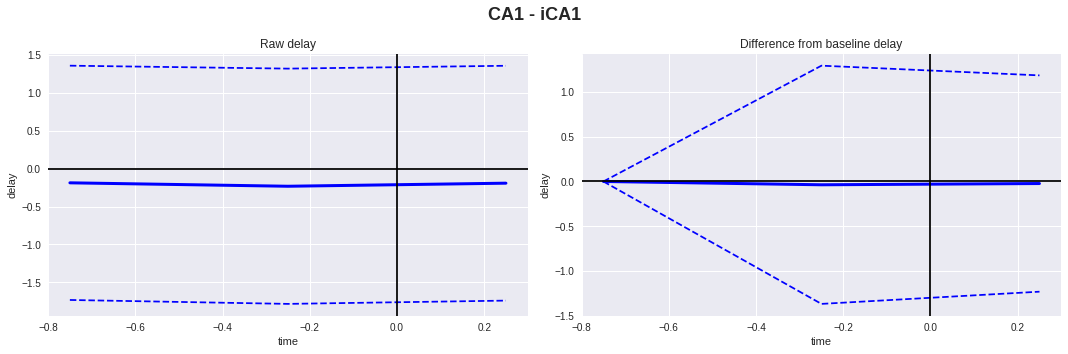

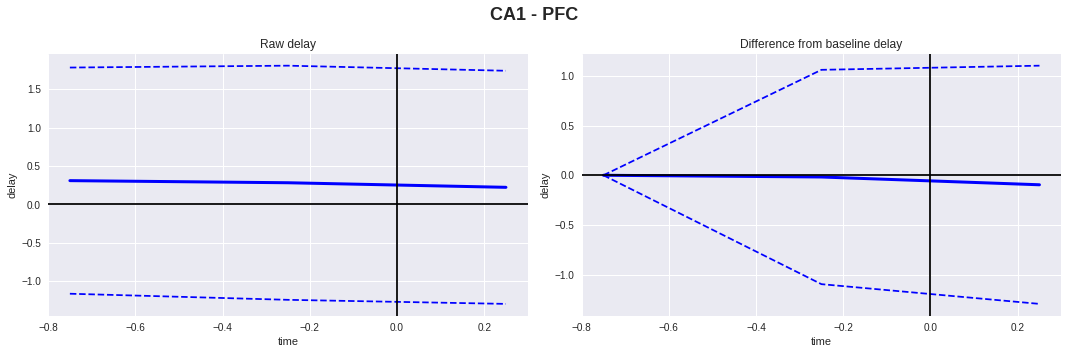

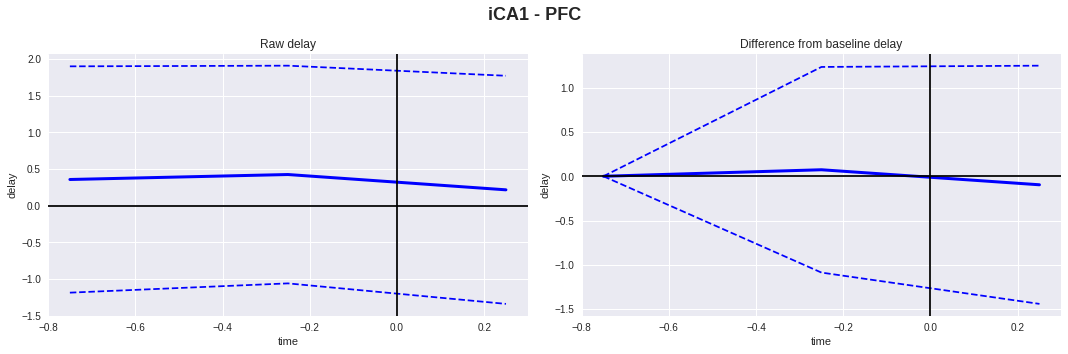

In [22]:
path = '../Processed-Data/*.nc'
group = '2Hz_Resolution/all_ripples/group_delay'
frequency_band = 'theta'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay(path, group, brain_area1, brain_area2, frequency_band)

### Beta

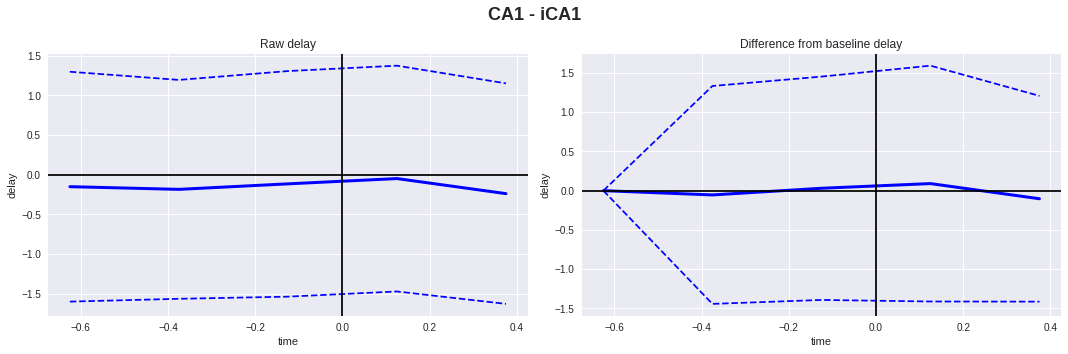

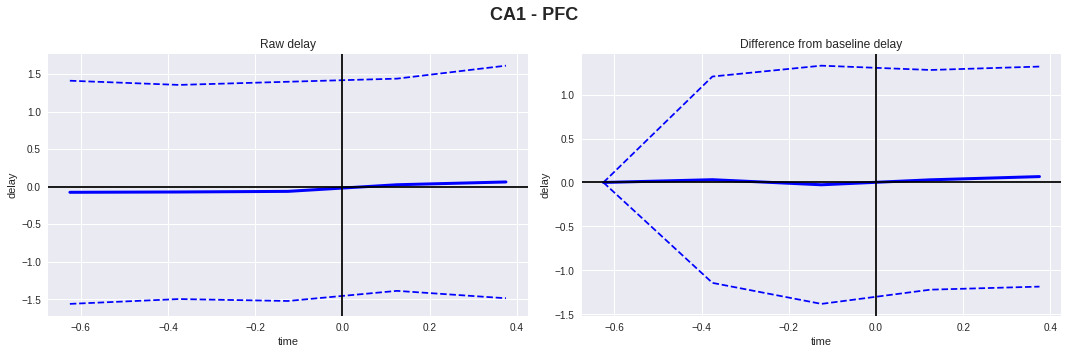

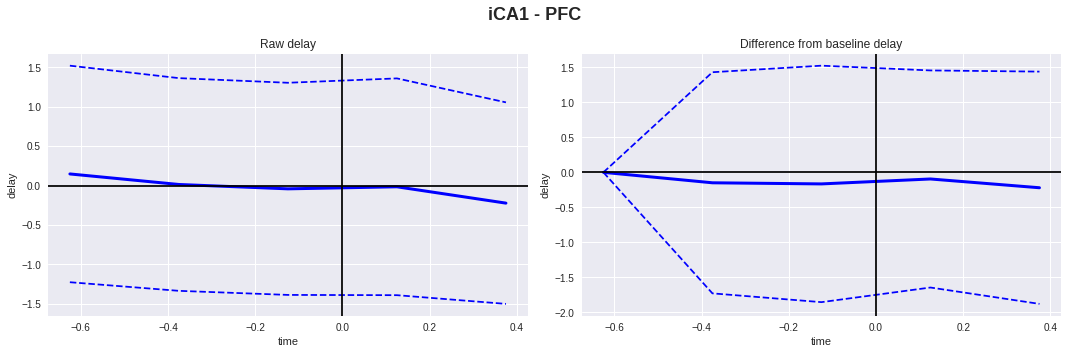

In [6]:
path = '../Processed-Data/*.nc'
group = '4Hz_Resolution/all_ripples/group_delay'
frequency_band = 'beta'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay(path, group, brain_area1, brain_area2, frequency_band)

### Slow Gamma

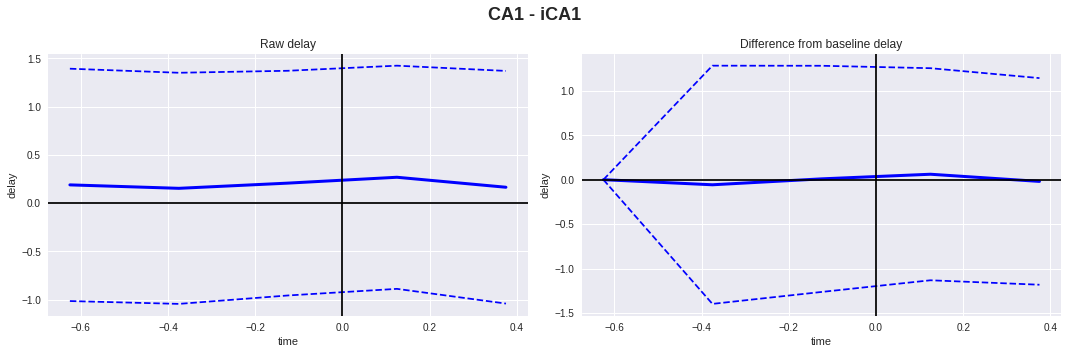

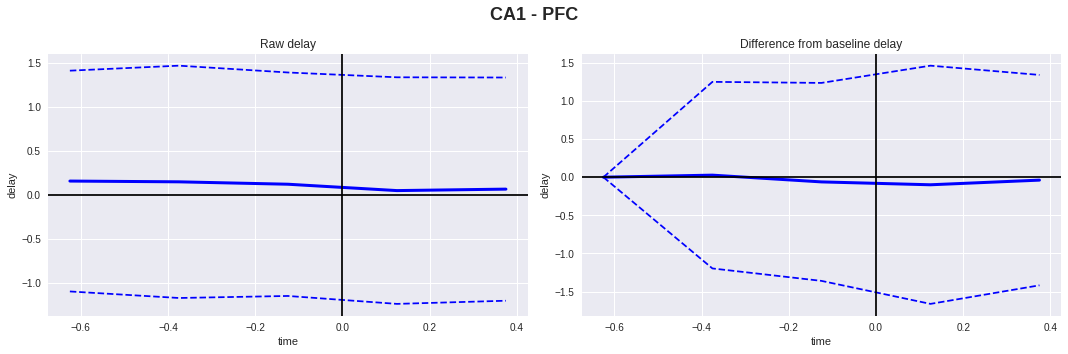

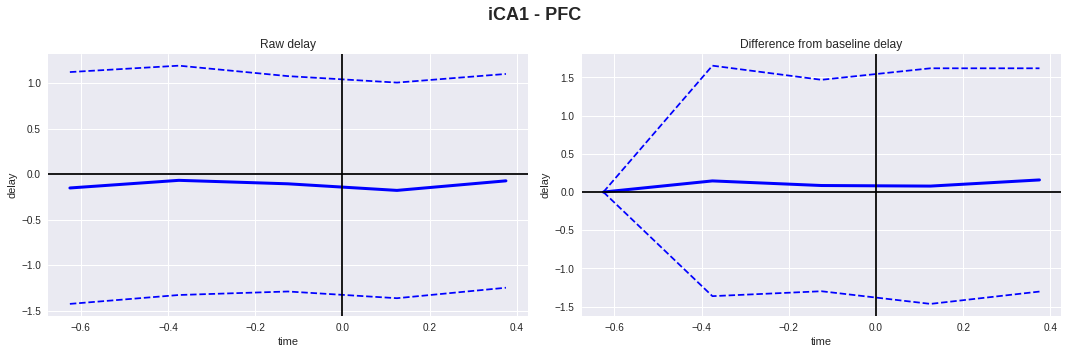

In [7]:
path = '../Processed-Data/*.nc'
group = '4Hz_Resolution/all_ripples/group_delay'
frequency_band = 'slow_gamma'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay(path, group, brain_area1, brain_area2, frequency_band)

### Ripple Band

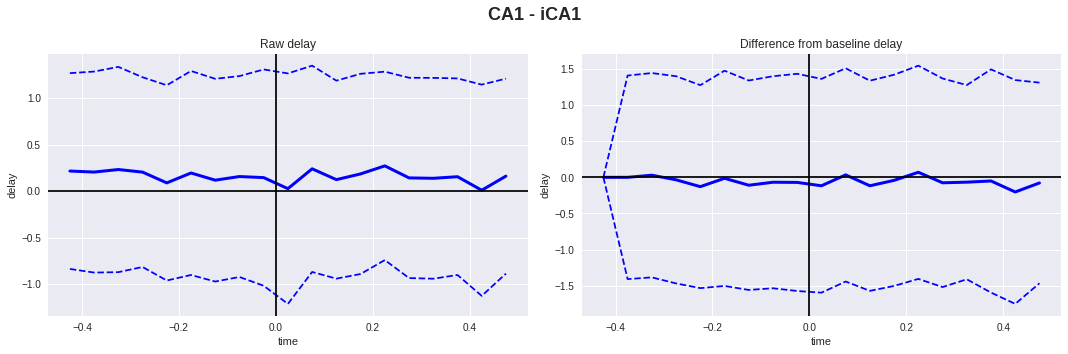

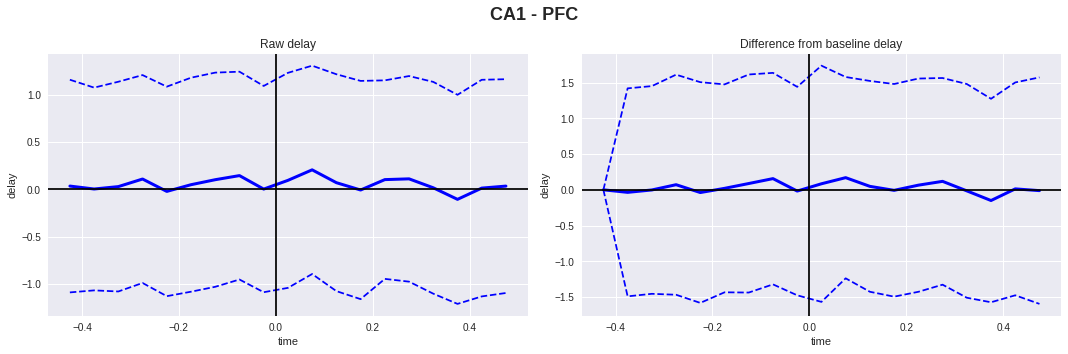

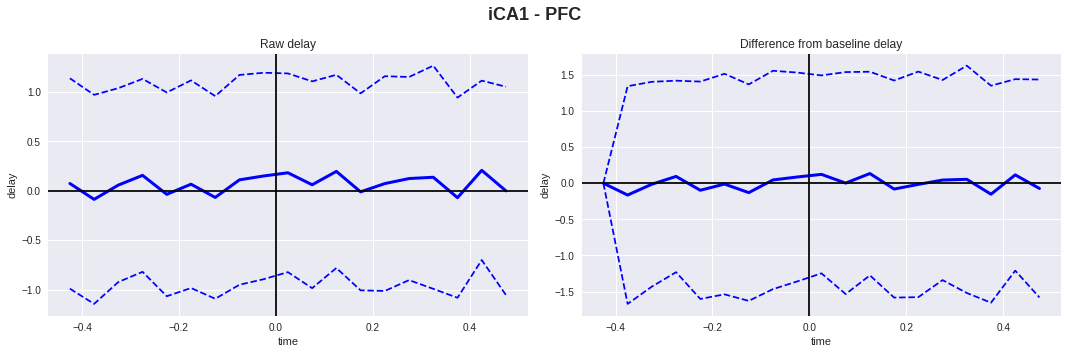

In [8]:
path = '../Processed-Data/*.nc'
group = '20Hz_Resolution/all_ripples/group_delay'
frequency_band = 'ripple'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay(path, group, brain_area1, brain_area2, frequency_band)

## Ripple Direction: Forward vs. Reverse

### Theta

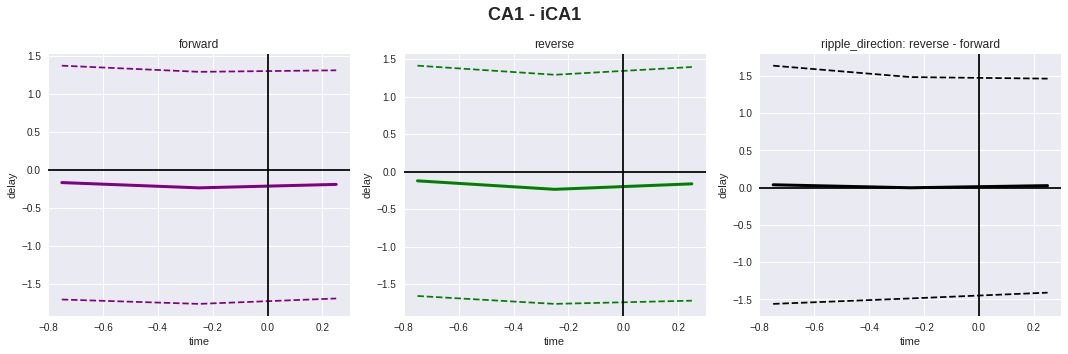

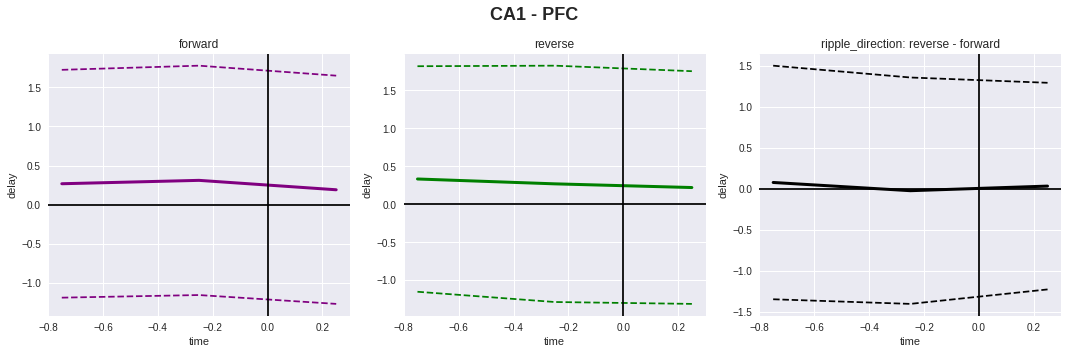

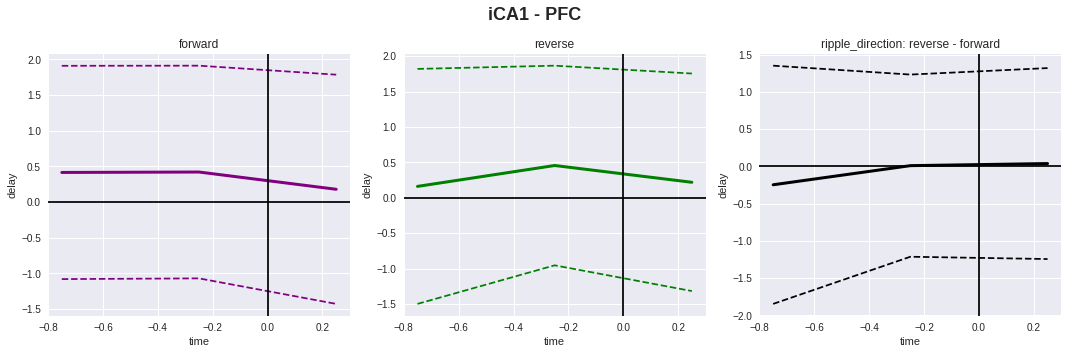

In [9]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_direction'
level1 = 'forward'
level2 = 'reverse'
resolution = '2Hz_Resolution'
frequency_band = 'theta'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)

### Beta

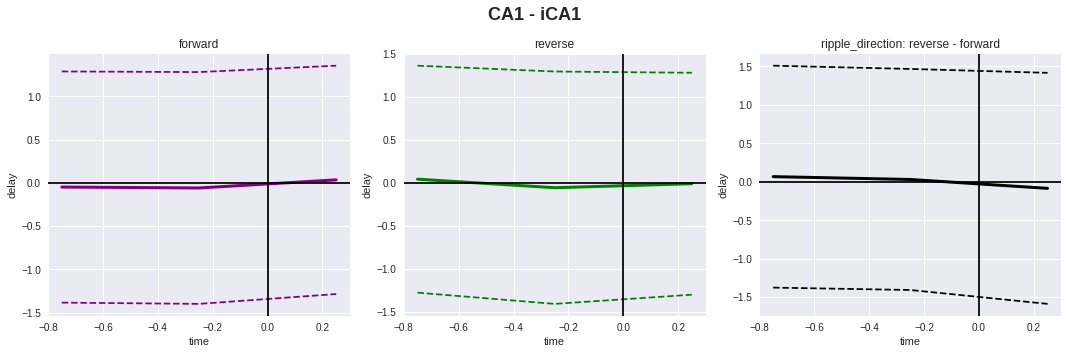

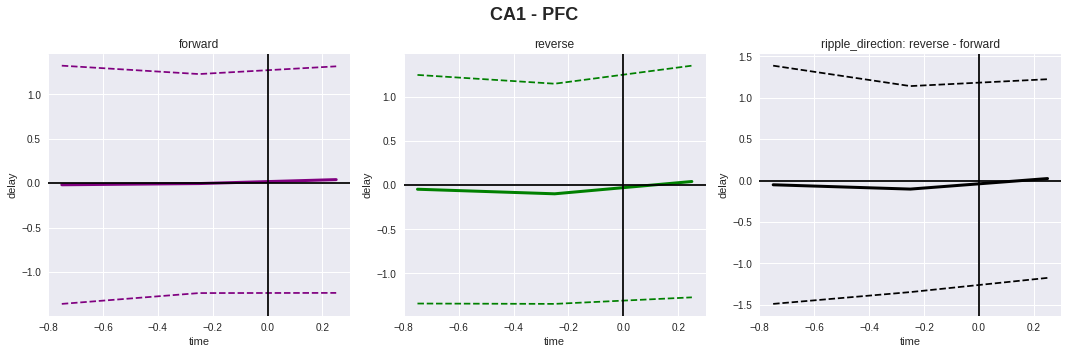

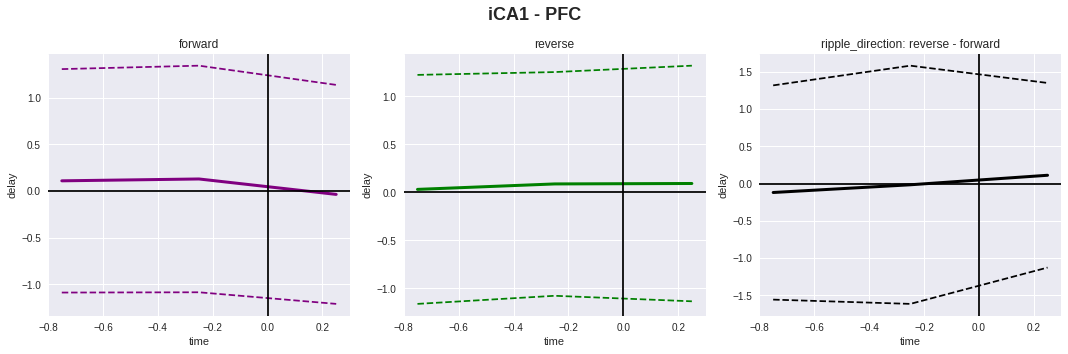

In [10]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_direction'
level1 = 'forward'
level2 = 'reverse'
resolution = '2Hz_Resolution'
frequency_band = 'beta'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)

### Slow Gamma

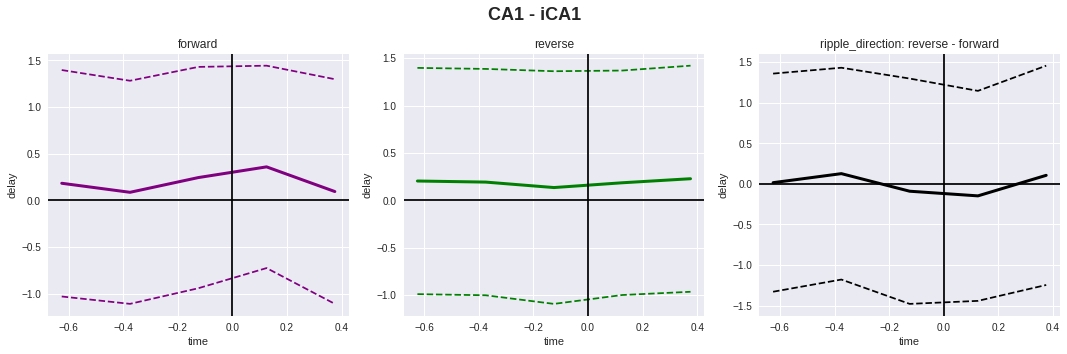

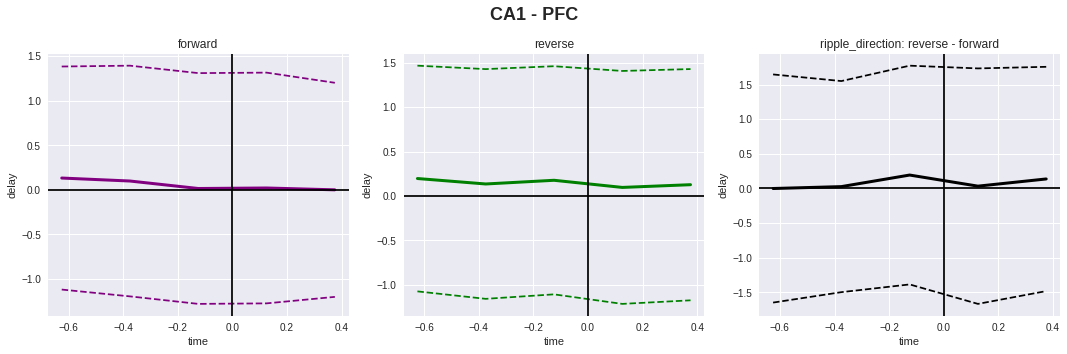

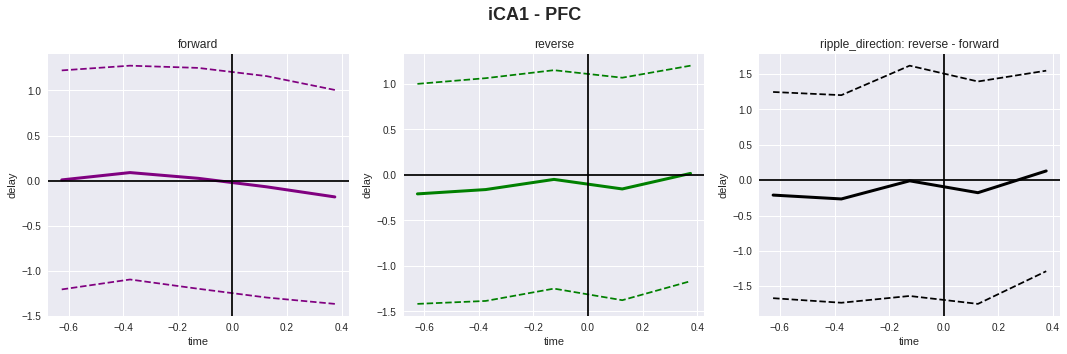

In [11]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_direction'
level1 = 'forward'
level2 = 'reverse'
resolution = '4Hz_Resolution'
frequency_band = 'slow_gamma'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)

### Ripple

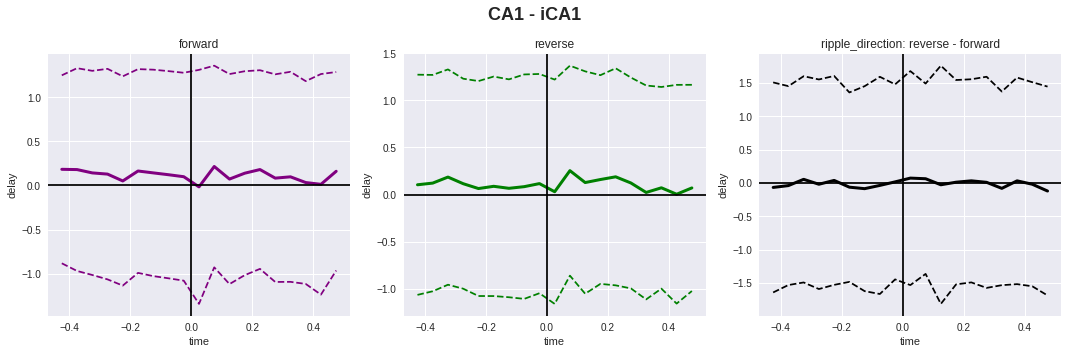

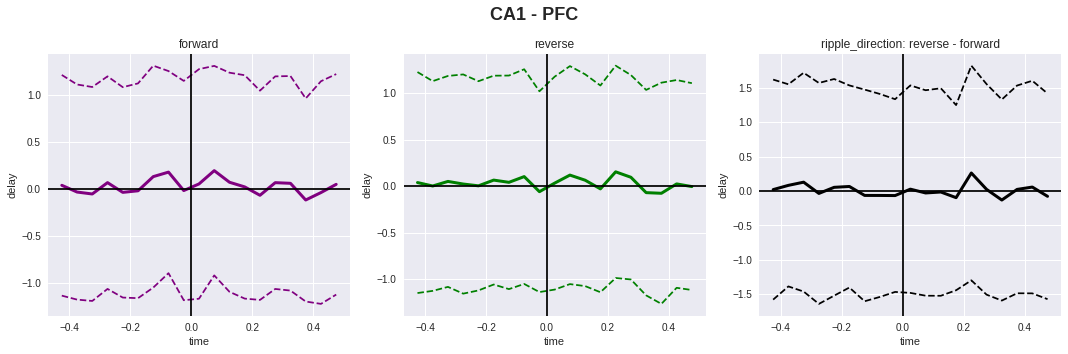

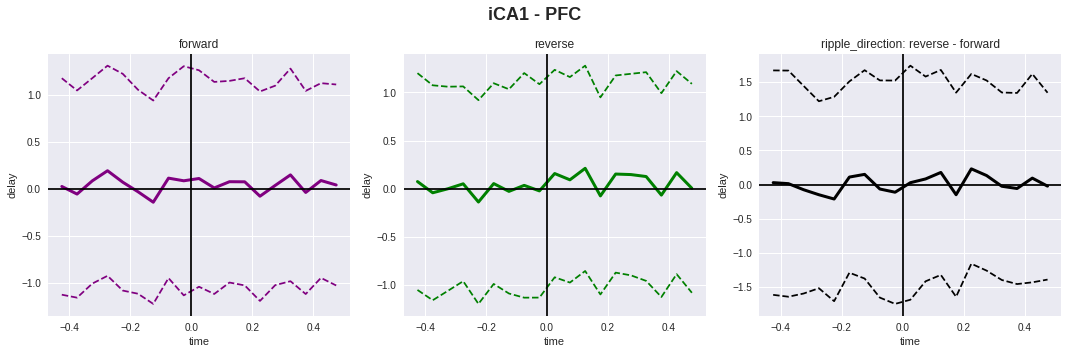

In [12]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_direction'
level1 = 'forward'
level2 = 'reverse'
resolution = '20Hz_Resolution'
frequency_band = 'ripple'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)

## Ripple Trajectory: Inbound vs. Outbound

### Theta

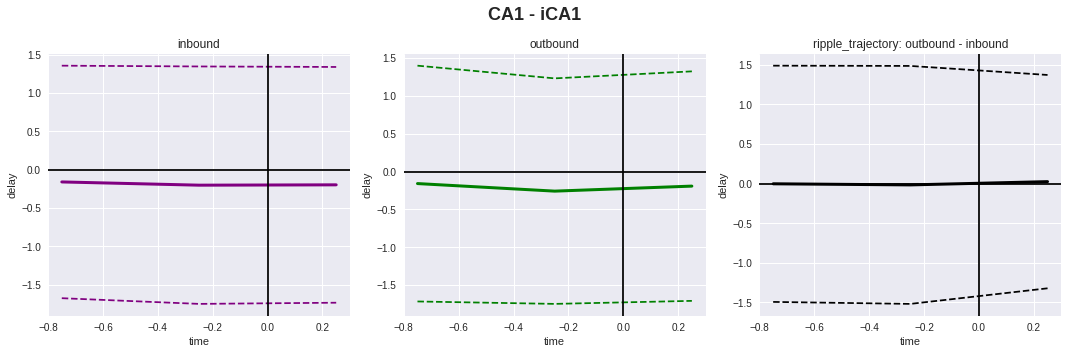

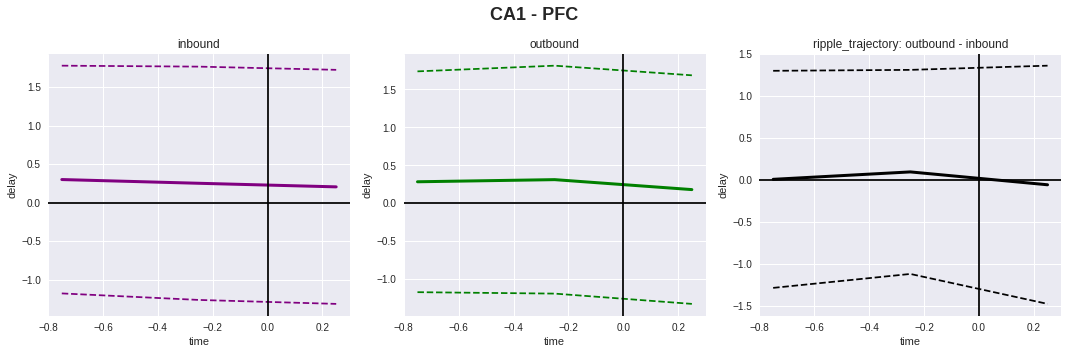

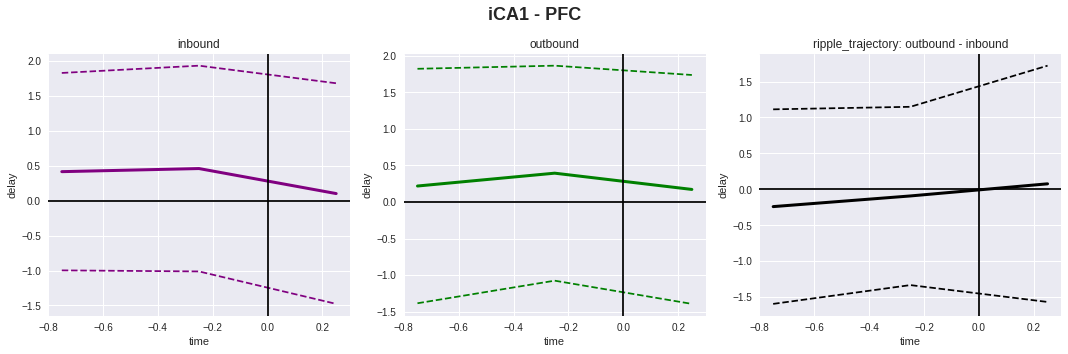

In [16]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_trajectory'
level1 = 'inbound'
level2 = 'outbound'
resolution = '2Hz_Resolution'
frequency_band = 'theta'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)

### Beta

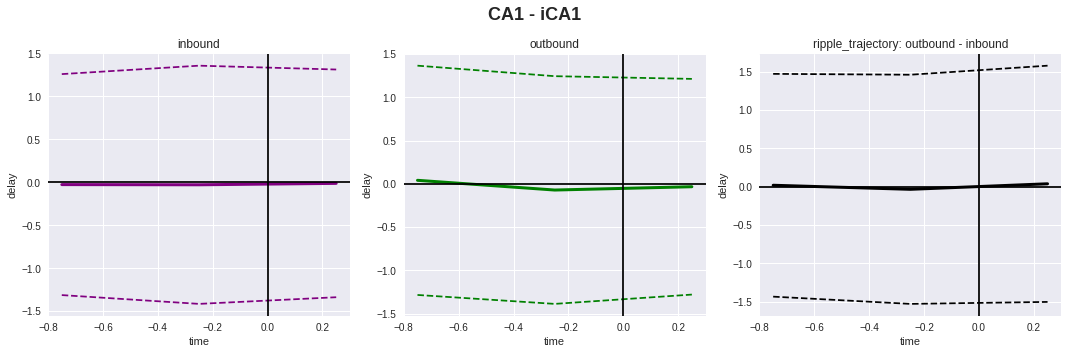

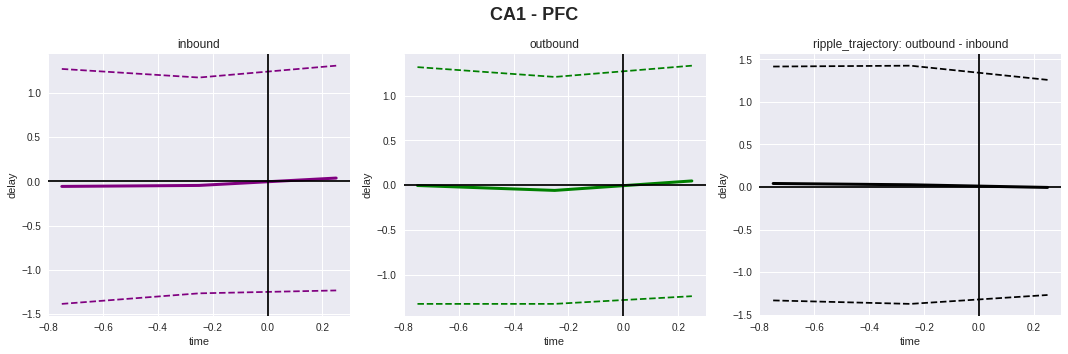

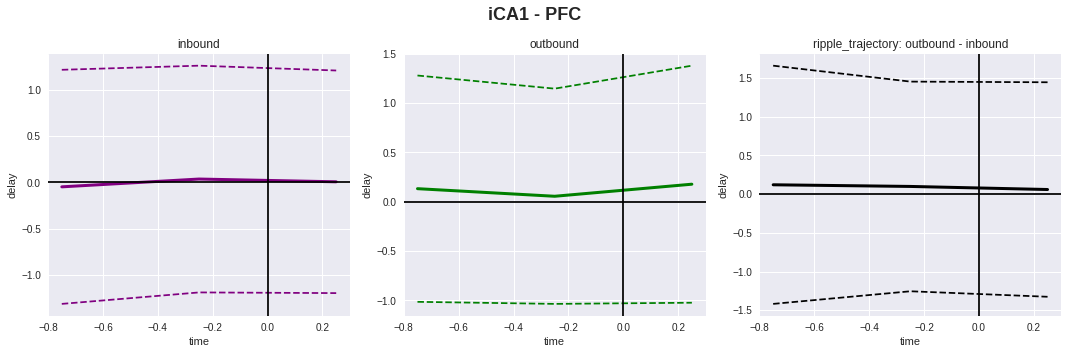

In [17]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_trajectory'
level1 = 'inbound'
level2 = 'outbound'
resolution = '2Hz_Resolution'
frequency_band = 'beta'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)

### Slow Gamma

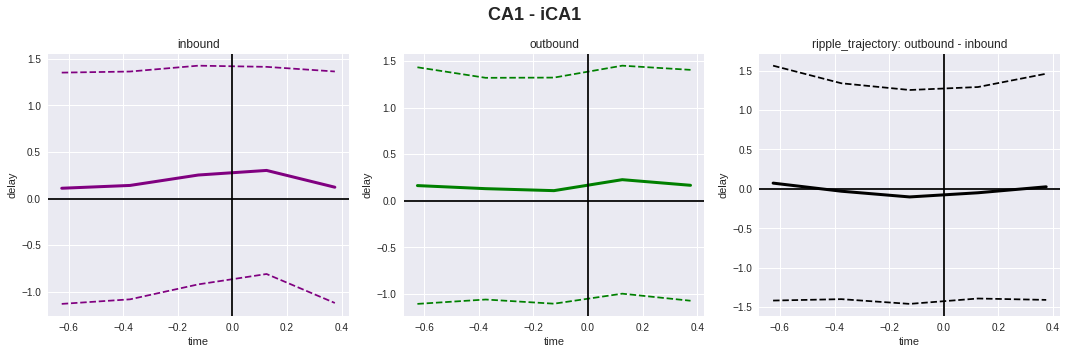

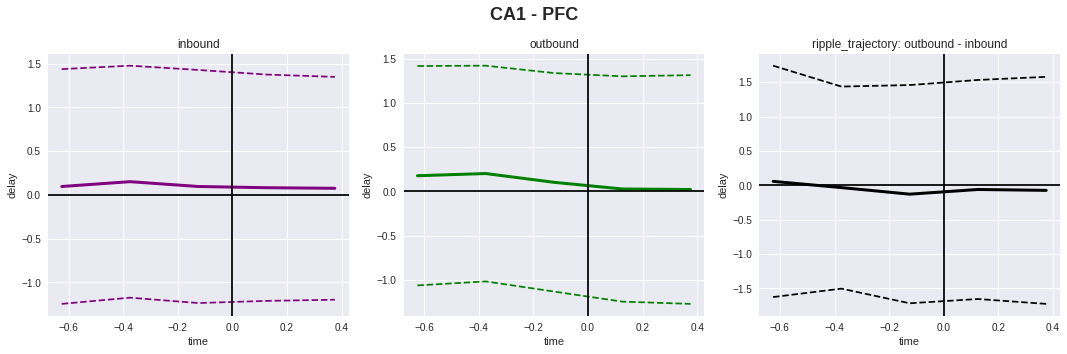

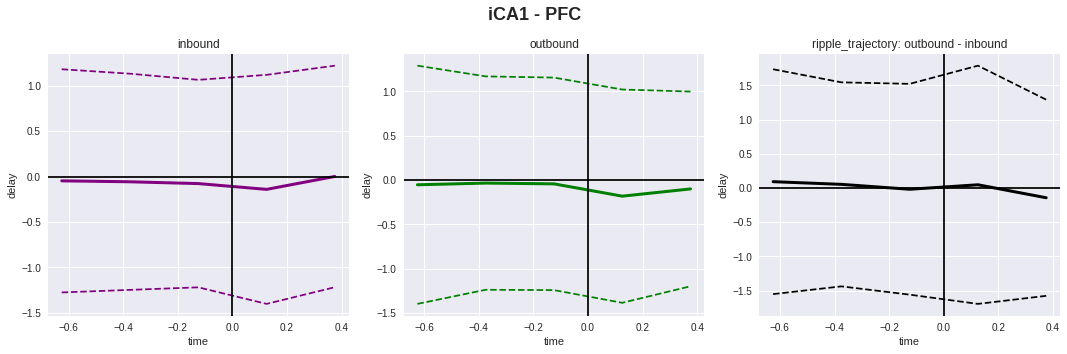

In [18]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_trajectory'
level1 = 'inbound'
level2 = 'outbound'
resolution = '4Hz_Resolution'
frequency_band = 'slow_gamma'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)

### Ripple 

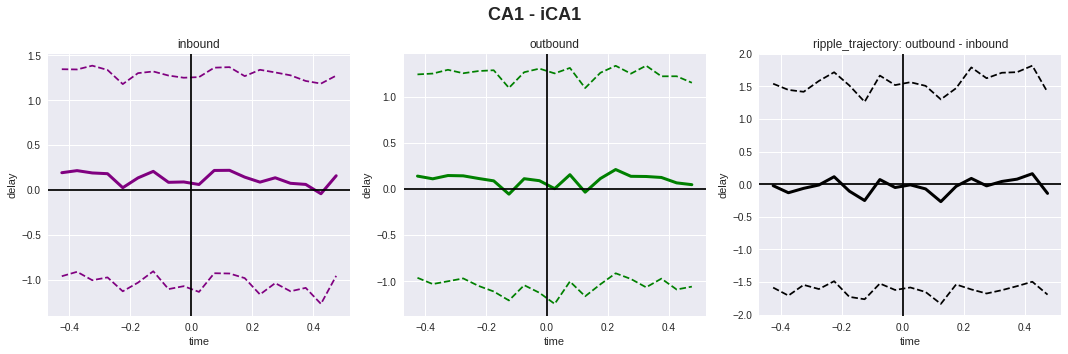

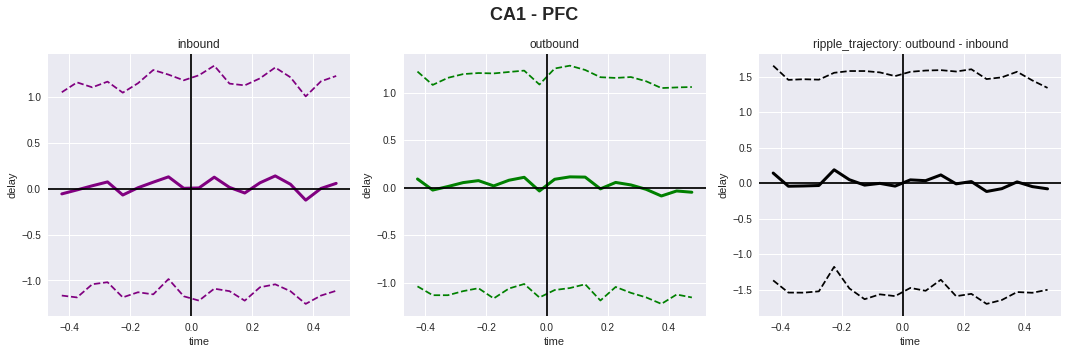

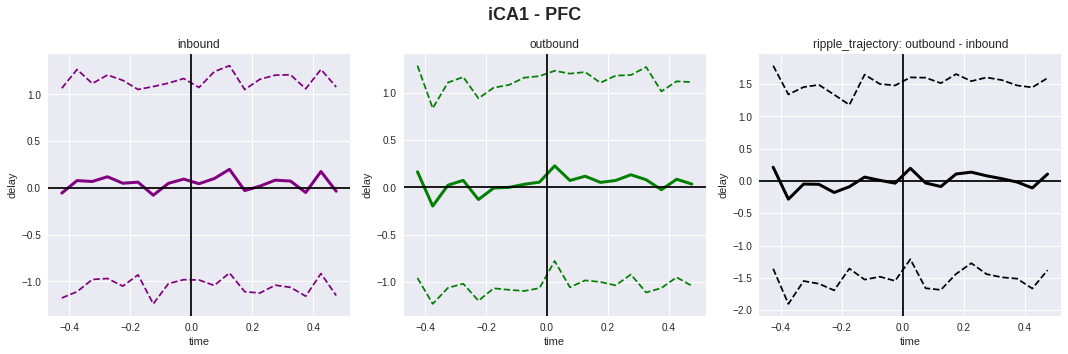

In [19]:
path = '../Processed-Data/*.nc'
covariate = 'ripple_trajectory'
level1 = 'inbound'
level2 = 'outbound'
resolution = '20Hz_Resolution'
frequency_band = 'ripple'

brain_areas = ['CA1', 'iCA1', 'PFC']
for brain_area1, brain_area2 in combinations(brain_areas, 2):
    plot_delay_by_ripple_type(path, brain_area1, brain_area2, frequency_band,
                              resolution, covariate, level1, level2)